In [4]:
#@title
import cv2
import os
from google.colab.patches import cv2_imshow
import time

start = time.time()

# set path
input_video = "/content/drive/MyDrive/datasets/dog/dog_video_sample2.mp4"
output_save_folder = "/content/drive/MyDrive/datasets/dog/video_cap_result"

# capture video
cap = cv2.VideoCapture(input_video)

# print frame info
# vid_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# avid_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# vid_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print("wid={}, hei={}, leng={}".format(vid_width, vid_height, vid_length))

# create save folder
if not os.path.exists(output_save_folder):
  os.makedirs(output_save_folder)

# write frame
i=0
while (cap.isOpened()):
  ret, frame = cap.read()
  if ret == False:
    break
  cv2.imwrite("{}/{}.png".format(output_save_folder, i), frame)
  i+=1

cap.release()
cv2.destroyAllWindows()

print("\nvideo capturing time: {}".format(round(time.time() - start, 4)))


video capturing time: 58.1202


In [5]:
# import library
import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load models
detector_path = '/content/drive/MyDrive/datasets/dog/dogHeadDetector.dat'
predictor_path = '/content/drive/MyDrive/datasets/dog/landmarkDetector.dat'

detector = dlib.cnn_face_detection_model_v1(detector_path)
predictor = dlib.shape_predictor(predictor_path)

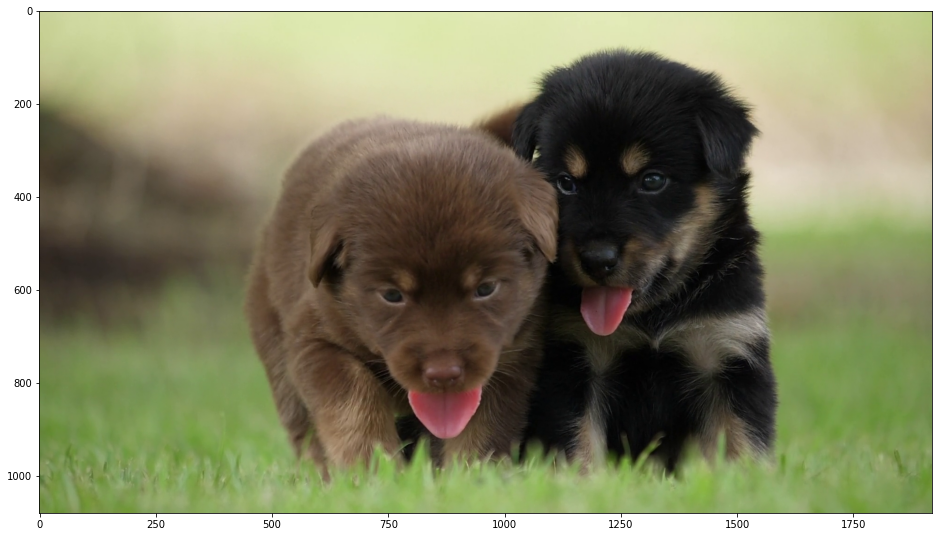

In [7]:
# load dog image
img_path = output_save_folder
# filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(os.path.join(img_path, '421.png'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, dsize=None, fx=0.5, fy=0.5)

plt.figure(figsize=(16, 16))
plt.imshow(img)

mmod_rectangles[[(1025, 218) (1448, 640)], [(589, 416) (1096, 923)]]
Detection 0: Left: 1025 Top: 218 Right: 1448 Bottom: 640 Confidence: 1.042482614517212
Detection 1: Left: 589 Top: 416 Right: 1096 Bottom: 923 Confidence: 0.8699124455451965


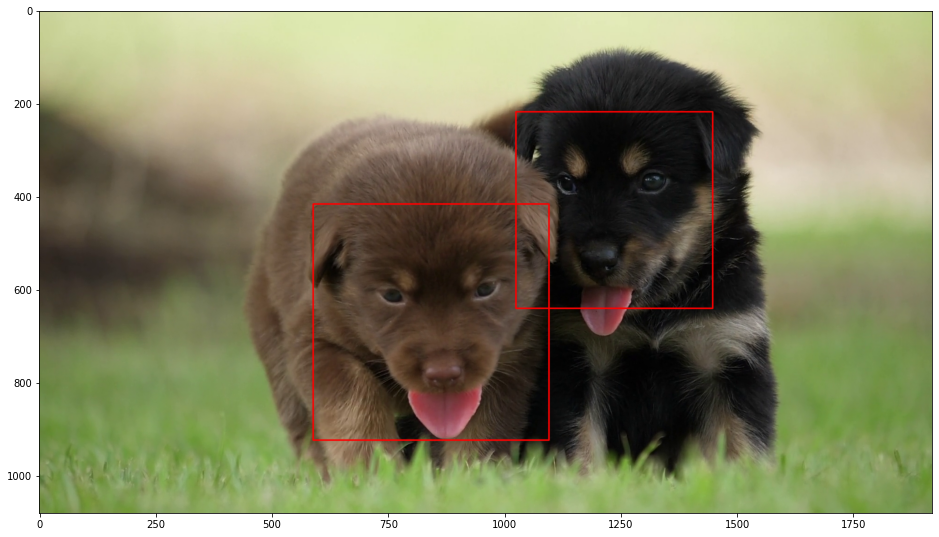

In [8]:
# detect dog's face
dets = detector(img, upsample_num_times=1)

if dets: 
  print(dets)
  
  img_result = img.copy()

  for i, d in enumerate(dets):
      print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

      x1, y1 = d.rect.left(), d.rect.top()
      x2, y2 = d.rect.right(), d.rect.bottom()

      cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
      
  plt.figure(figsize=(16, 16))
  plt.imshow(img_result)
else: 
  print('강아지 얼굴을 찾을 수 없습니다.')

1번째 강아지의 landmark 좌표:
[[1259  151]
 [1383  185]
 [1323  371]
 [1196  588]
 [1137  183]
 [1155  366]]
2번째 강아지의 landmark 좌표:
[[ 864  336]
 [1015  371]
 [ 979  604]
 [ 870  791]
 [ 712  367]
 [ 751  605]]

time: 0.4535 
time per 60 frame:  27.21 
time per 10 seconds:  272.1014

 [[1259  151]
 [1383  185]
 [1323  371]
 [1196  588]
 [1137  183]
 [1155  366]] 

total points:  12


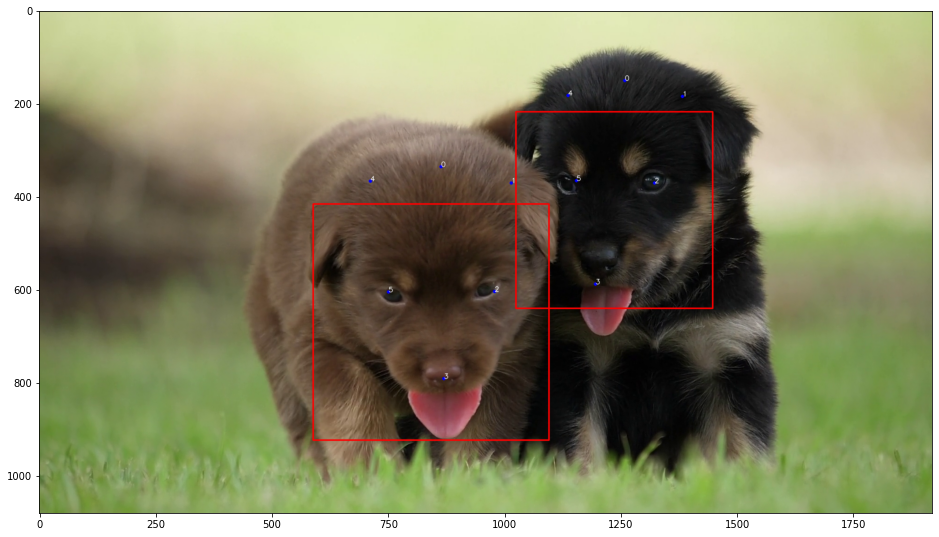

In [9]:
# detect landmarks
import time

start = time.time()
shapes = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    print("{}번째 강아지의 landmark 좌표:\n{}".format(i+1, shape))
    
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, center=tuple(p), radius=3, color=(0,0,255), thickness=-1, lineType=cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)

print("\ntime: {}".format(round(time.time() - start, 4)), 
      "\ntime per 60 frame: ", round((time.time() - start) * 60, 4),
      "\ntime per 10 seconds: ", round((time.time() - start) * 60 * 10, 4))     

if shapes:  # len(shapes) > 0 <<<<< 이걸 사용할 수도 있지만 파이썬에선 비권장.
  print("\n", shapes[0],"\n\ntotal points: ", len(shapes))  

img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
# cv2.imwrite('img/%s_out%s' % (filename, ext), img_out)
plt.figure(figsize=(16, 16))
plt.imshow(img_result)